## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gmsh
import time
import pylab as pl
import gmsh
from IPython import display
from matplotlib.path import Path
from scipy.sparse import coo_array, csr_array, csc_array
from collections import Counter
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import scipy
import time
from multiprocessing import Manager,Pool
import gc
from gmsh_util import createMesh, read_mesh

In [2]:
from worker_rect import qs_helper
from quasi_static_util import quasi_static_fem, quasi_static_picard

ImportError: cannot import name 'qs_helper' from 'worker_rect' (d:\IIT NOTES\Fea_project\ME5204-Project\worker_rect.py)

## Validation of quasi-static solver code 
### (using a variable mesh as prescribed in literature)

In [5]:
nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                msf_all = 1,
                                msf_adapt=0.5,
                                side = 6,
                                x_s=50,
                                y_s=25,
                                is_adapt=True
                                )

Reading reqd_mesh.msh
Number of nodes in the mesh: 6565
Number of triangles in the mesh: 12828



In [ ]:
# No source
soln_qs = quasi_static_fem(nodecoords,ele_con,np.array([[50,25]]))
h,K,G,F,boundary,theta = soln_qs.fit_ele(mode = "no_source",verbose = False)
plt.figure(figsize=(8,4))
plt.tricontourf(nodecoords[:,0],nodecoords[:,1],theta.flatten(),cmap = 'jet')
plt.colorbar()
plt.show()

In [ ]:
gc.collect()

In [ ]:
print(f"The maximum temperature is {np.max(theta):.2f}C and the minimum temperature is {np.min(theta):.2f} C")

In [ ]:
#Source with physical properties not being a function of temperature
soln_qs = quasi_static_fem(nodecoords,ele_con,np.array([[50,25]]))
_,K,G,F,boundary,theta = soln_qs.fit_ele(mode = "linear",verbose = False)
# h,K,G,F,boundary_term,theta
gc.collect()
plt.figure(figsize=(8,4))
plt.tricontourf(nodecoords[:,0],nodecoords[:,1],theta.flatten(),cmap = 'jet')
plt.colorbar()
plt.show()

In [ ]:
gc.collect()

In [ ]:
print(f"The maximum temperature is {np.max(theta):.2f} K and the minimum temperature is {np.min(theta):.2f} K")

## Validation of picard iteration

In [26]:
from picard_valid_util import picard_sq, picard_iterative_sq

Reading reqd_mesh.msh
Number of nodes in the mesh: 380
Number of triangles in the mesh: 690

Error at 1 iteration at time 0 is 2.34E+02
Error at 2 iteration at time 0 is 3.52E+00
Error at 3 iteration at time 0 is 3.69E-02
Error at 4 iteration at time 0 is 2.79E-04
Error at 5 iteration at time 0 is 1.79E-06
Error at 1 iteration at time 1 is 6.46E+01
Error at 2 iteration at time 1 is 4.82E-01
Error at 3 iteration at time 1 is 2.65E-03
Error at 4 iteration at time 1 is 1.24E-05
Error at 1 iteration at time 2 is 4.52E+01
Error at 2 iteration at time 2 is 2.56E-01
Error at 3 iteration at time 2 is 1.29E-03
Error at 4 iteration at time 2 is 1.17E-05
Error at 1 iteration at time 3 is 3.69E+01
Error at 2 iteration at time 3 is 1.62E-01
Error at 3 iteration at time 3 is 9.17E-04
Error at 4 iteration at time 3 is 8.05E-06
Error at 1 iteration at time 4 is 3.23E+01
Error at 2 iteration at time 4 is 1.15E-01
Error at 3 iteration at time 4 is 6.96E-04
Error at 4 iteration at time 4 is 5.51E-06
Erro

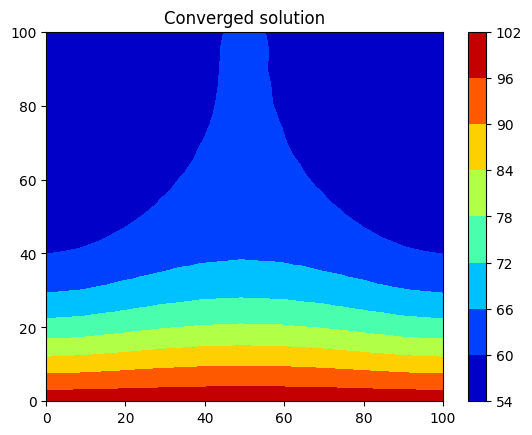

In [27]:
mesh_size_factor = 3
filename = f"square_{mesh_size_factor}.msh"
nodecoords,ele_con = createMesh(geo_file='squareDomain.geo',
                                msf_all=mesh_size_factor) 
soln3 = picard_sq(nodecoords,ele_con)
T_b = 273+50
theta_init = np.zeros((nodecoords.shape[0],1))+T_b
theta_final = picard_iterative_sq(soln3,nodecoords,ele_con,theta_init)

In [28]:
Ta = theta_final[np.where((nodecoords[:,0] == 0) * (nodecoords[:,1] == 100)) [0][0]]-273
Tb = theta_final[np.where((nodecoords[:,0] == 100) * (nodecoords[:,1] == 100)) [0][0]]-273
print(f"The temperature at node a is {Ta[0]:.2f}K and at node b is {Tb[0]:.2f}K")

The temperature at node a is 54.74K and at node b is 54.74K


In [ ]:
gc.collect()

## Newton Raphson validation

In [17]:
import numpy as np
from nr_valid_util import nr_sq, nr_iterative_sq

Reading reqd_mesh.msh
Number of nodes in the mesh: 380
Number of triangles in the mesh: 690

Error at 1 iteration at time 0 is 2.13E+02
Error at 2 iteration at time 0 is 2.75E+00
Error at 3 iteration at time 0 is 6.25E-03
Error at 4 iteration at time 0 is 5.91E-05
Error at 1 iteration at time 1 is 5.21E+01
Error at 2 iteration at time 1 is 9.42E-02
Error at 3 iteration at time 1 is 2.66E-04
Error at 1 iteration at time 2 is 3.81E+01
Error at 2 iteration at time 2 is 6.00E-02
Error at 3 iteration at time 2 is 9.72E-05
Error at 1 iteration at time 3 is 3.24E+01
Error at 2 iteration at time 3 is 3.48E-02
Error at 3 iteration at time 3 is 6.37E-05
Error at 1 iteration at time 4 is 2.92E+01
Error at 2 iteration at time 4 is 2.23E-02
Error at 3 iteration at time 4 is 4.66E-05
Error at 1 iteration at time 5 is 2.70E+01
Error at 2 iteration at time 5 is 1.54E-02
Error at 3 iteration at time 5 is 3.58E-05
Error at 1 iteration at time 6 is 2.54E+01
Error at 2 iteration at time 6 is 1.13E-02
Erro

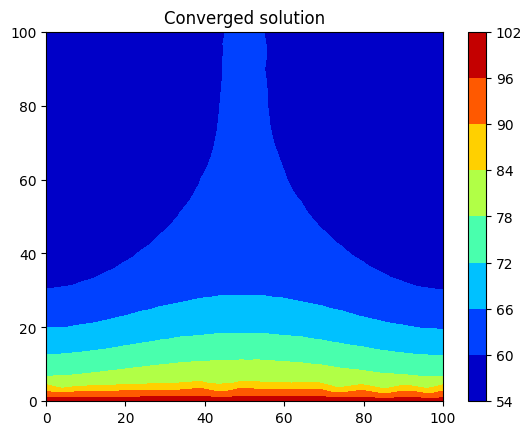

In [18]:
mesh_size_factor = 3
filename = f"square_{mesh_size_factor}.msh"
nodecoords,ele_con = createMesh(geo_file='squareDomain.geo',
                                msf_all=mesh_size_factor) 
soln3 = nr_sq(nodecoords,ele_con)
T_b = 273+50
theta_init = np.zeros((nodecoords.shape[0],1))+T_b
theta_final = nr_iterative_sq(soln3,nodecoords,ele_con,theta_init)

In [19]:
Ta = theta_final[np.where((nodecoords[:,0] == 0) * (nodecoords[:,1] == 100)) [0][0]]-273
Tb = theta_final[np.where((nodecoords[:,0] == 100) * (nodecoords[:,1] == 100)) [0][0]]-273
print(f"The temperature at node a is {Ta[0]:.2f}K and at node b is {Tb[0]:.2f}K")

The temperature at node a is 54.73K and at node b is 54.73K


## Newton raphson implementation

In [4]:
from transient_util import nr_iterative_rect

### Mesh convergence for static problem

Reading reqd_mesh.msh
Number of nodes in the mesh: 96
Number of triangles in the mesh: 156

Error at 1 iteration at time 0 is 5.22E+03
Error at 2 iteration at time 0 is 6.86E+00
Error at 3 iteration at time 0 is 1.27E-05


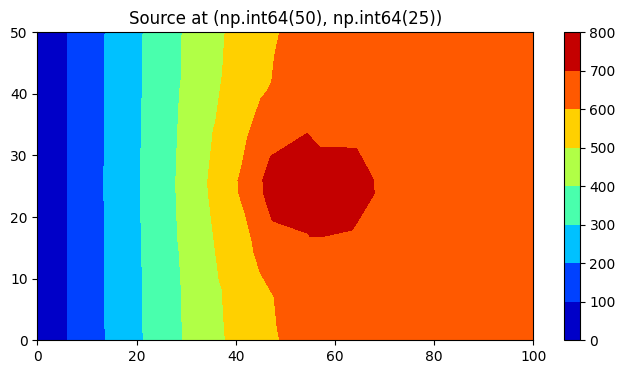

Reading reqd_mesh.msh
Number of nodes in the mesh: 140
Number of triangles in the mesh: 238

Error at 1 iteration at time 0 is 5.67E+03
Error at 2 iteration at time 0 is 6.61E+00
Error at 3 iteration at time 0 is 9.64E-06


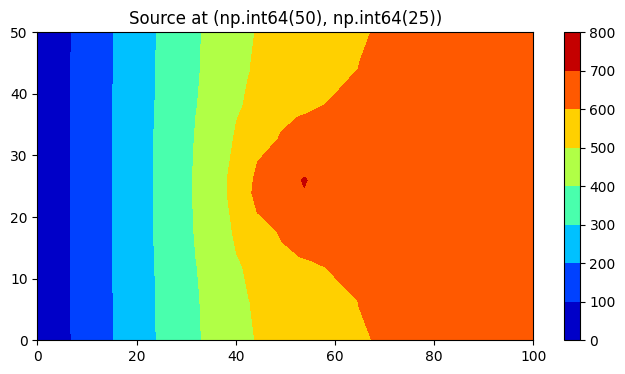

Reading reqd_mesh.msh
Number of nodes in the mesh: 221
Number of triangles in the mesh: 388

Error at 1 iteration at time 0 is 8.50E+03
Error at 2 iteration at time 0 is 1.17E+01
Error at 3 iteration at time 0 is 2.42E-05


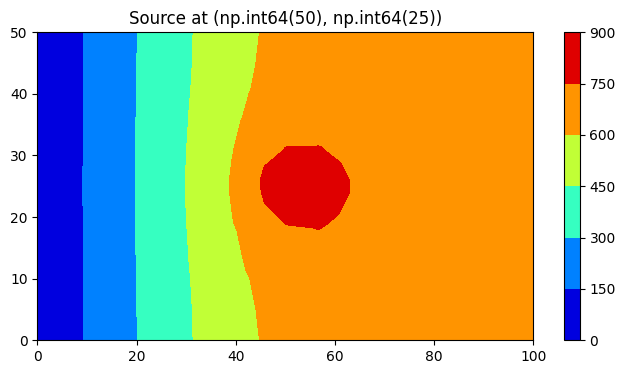

Reading reqd_mesh.msh
Number of nodes in the mesh: 450
Number of triangles in the mesh: 822

Error at 1 iteration at time 0 is 1.35E+04
Error at 2 iteration at time 0 is 2.09E+01
Error at 3 iteration at time 0 is 5.38E-05


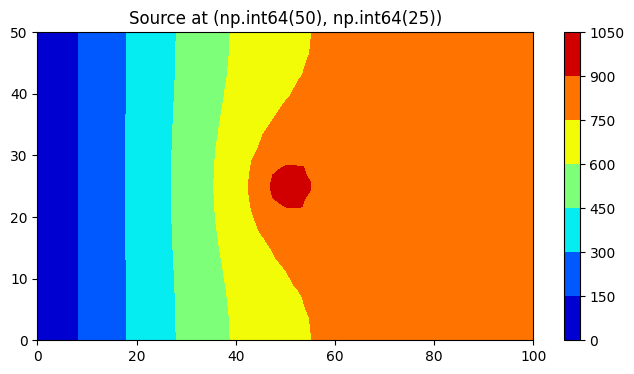

Reading reqd_mesh.msh
Number of nodes in the mesh: 2014
Number of triangles in the mesh: 3854

Error at 1 iteration at time 0 is 2.88E+04
Error at 2 iteration at time 0 is 4.47E+01
Error at 3 iteration at time 0 is 1.16E-04
Error at 4 iteration at time 0 is 8.34E-10


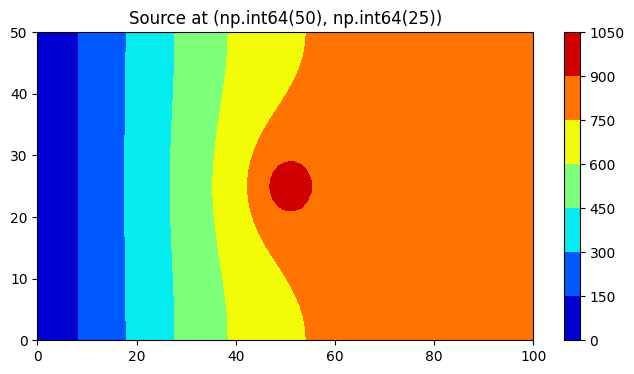

Reading reqd_mesh.msh
Number of nodes in the mesh: 2474
Number of triangles in the mesh: 4756

Error at 1 iteration at time 0 is 3.20E+04
Error at 2 iteration at time 0 is 4.96E+01
Error at 3 iteration at time 0 is 1.29E-04
Error at 4 iteration at time 0 is 1.09E-09


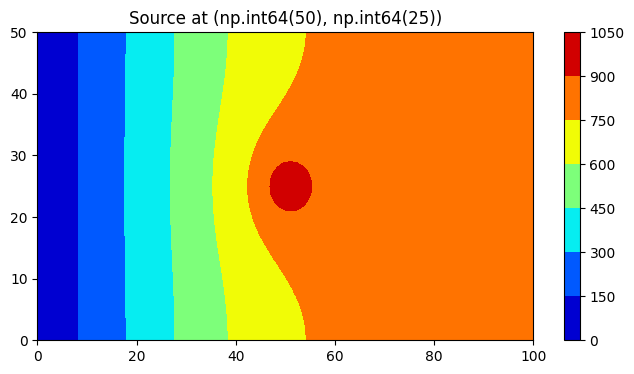

In [27]:
msfs = np.concat((np.arange(5,1,-1),np.array([0.9,0.8])))
T_l = 20
rep = np.array([[50,25,0]])
mesh_sizes = []
n_eles = []
T_reps = []

for msf in msfs:
    nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                    msf_all=msf) 
    theta_init = np.zeros((nodecoords.shape[0],1))+T_l
    h,theta_fin = nr_iterative_rect(nodecoords,ele_con,np.array([[50,25]]),theta_init,type = "static",mode = "non_linear")
    mesh_sizes.append(h)
    distances = np.sum(np.square(nodecoords-rep),axis = 1)
    closest = np.argmin(distances)
    T_reps.append(theta_fin[closest])
    n_eles.append(len(ele_con))

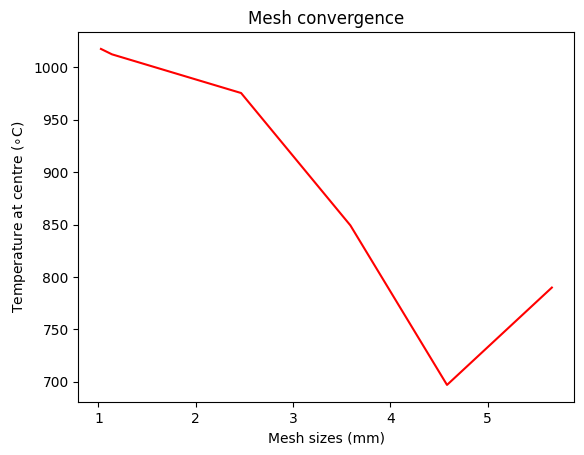

In [28]:
plt.plot(mesh_sizes,T_reps,'r')
plt.title('Mesh convergence')
plt.xlabel('Mesh sizes (mm)')
plt.ylabel(r'Temperature at centre ($\circ$C)')
plt.show()

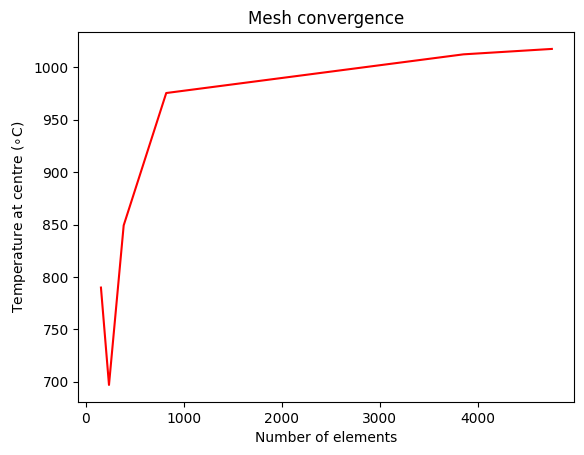

In [29]:
plt.plot(n_eles,T_reps,'r')
plt.title('Mesh convergence')
plt.xlabel('Number of elements')
plt.ylabel(r'Temperature at centre ($\circ$C)')
plt.show()

### Temporal convergence

Reading reqd_mesh.msh
Number of nodes in the mesh: 1596
Number of triangles in the mesh: 3040

Error at 1 iteration at time 0.0 is 1.04E+03
Error at 2 iteration at time 0.0 is 2.26E-01
Error at 3 iteration at time 0.0 is 2.62E-08


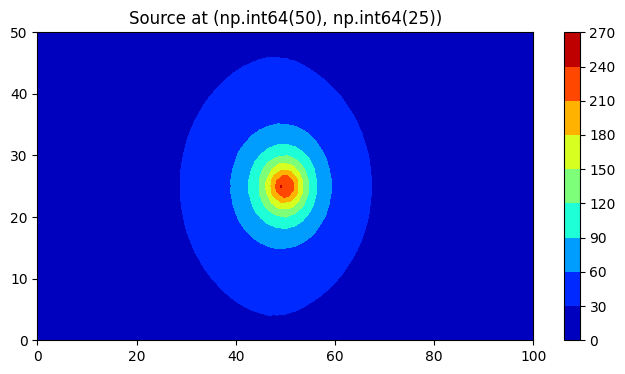

Error at 1 iteration at time 1.0 is 7.05E+02
Error at 2 iteration at time 1.0 is 7.15E-02
Error at 3 iteration at time 1.0 is 2.92E-09


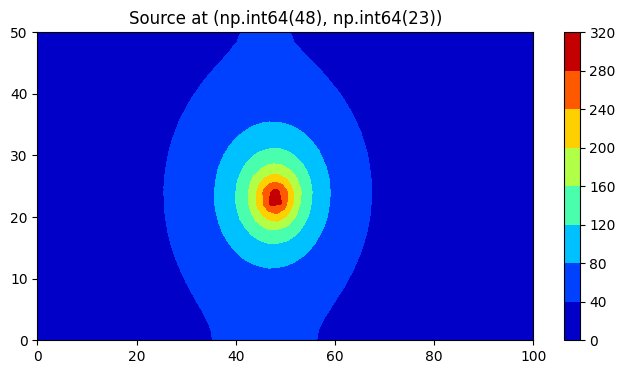

Reading reqd_mesh.msh
Number of nodes in the mesh: 1596
Number of triangles in the mesh: 3040

Error at 1 iteration at time 0.0 is 9.83E+02
Error at 2 iteration at time 0.0 is 2.09E-01
Error at 3 iteration at time 0.0 is 2.28E-08


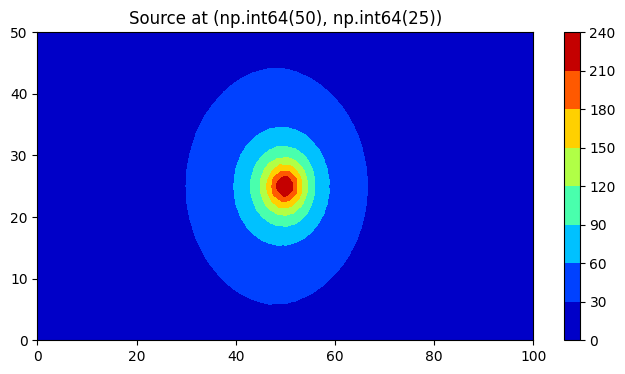

Error at 1 iteration at time 0.9 is 6.66E+02
Error at 2 iteration at time 0.9 is 6.83E-02
Error at 3 iteration at time 0.9 is 2.73E-09


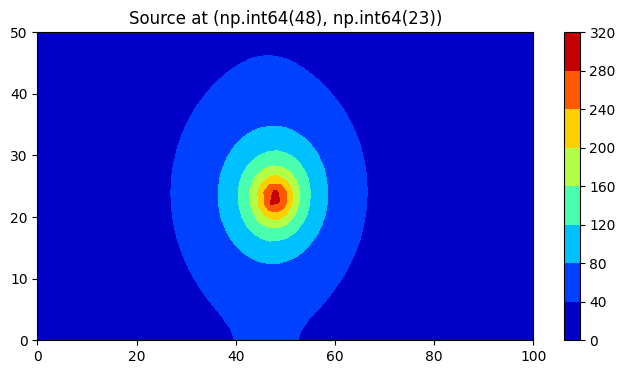

Error at 1 iteration at time 1.8 is 6.27E+02
Error at 2 iteration at time 1.8 is 5.44E-02
Error at 3 iteration at time 1.8 is 1.72E-09


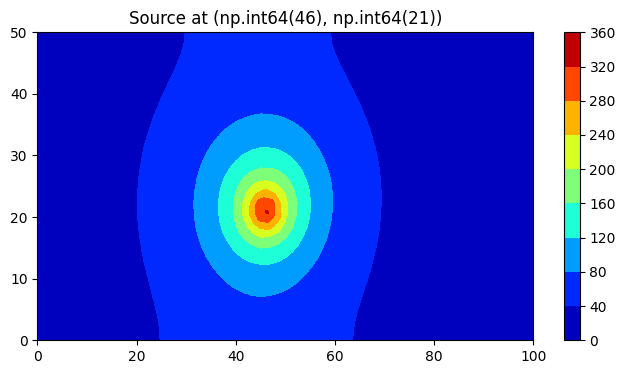

Reading reqd_mesh.msh
Number of nodes in the mesh: 1596
Number of triangles in the mesh: 3040

Error at 1 iteration at time 0.0 is 9.24E+02
Error at 2 iteration at time 0.0 is 1.91E-01
Error at 3 iteration at time 0.0 is 1.94E-08


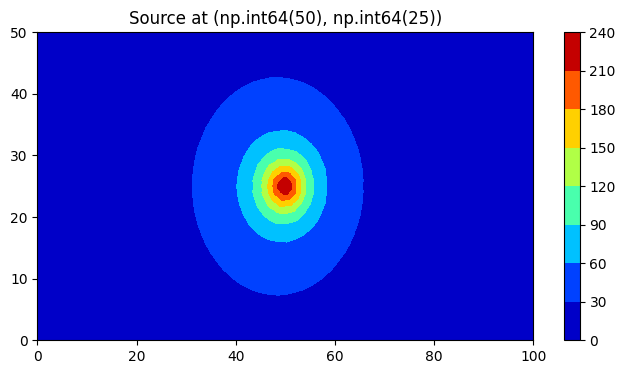

Error at 1 iteration at time 0.8 is 6.27E+02
Error at 2 iteration at time 0.8 is 6.49E-02
Error at 3 iteration at time 0.8 is 2.52E-09


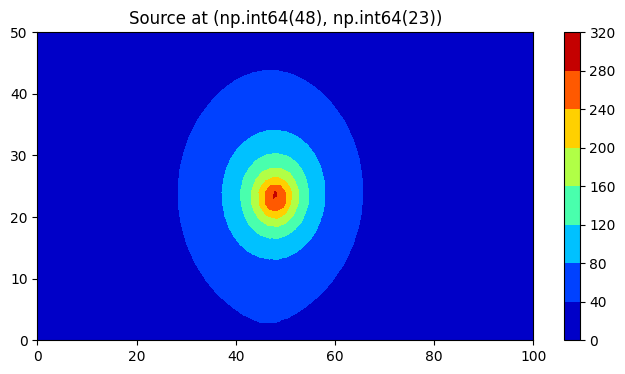

Error at 1 iteration at time 1.6 is 5.91E+02
Error at 2 iteration at time 1.6 is 5.23E-02
Error at 3 iteration at time 1.6 is 1.62E-09


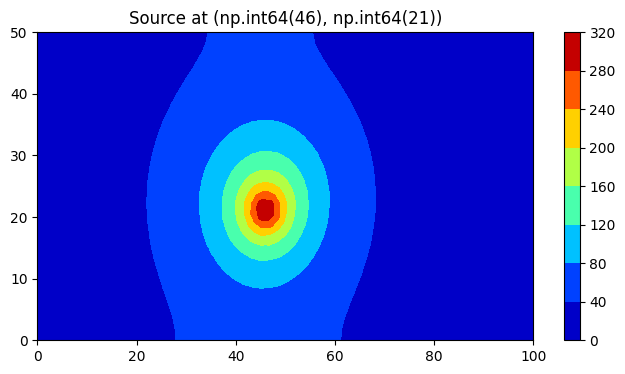

Reading reqd_mesh.msh
Number of nodes in the mesh: 1596
Number of triangles in the mesh: 3040

Error at 1 iteration at time 0.0 is 8.61E+02
Error at 2 iteration at time 0.0 is 1.72E-01
Error at 3 iteration at time 0.0 is 1.60E-08


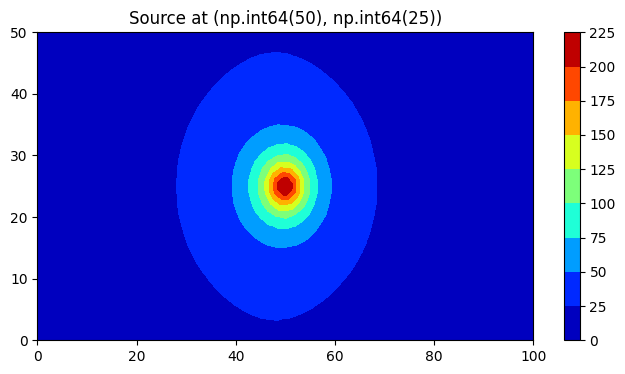

Error at 1 iteration at time 0.7000000000000001 is 5.86E+02
Error at 2 iteration at time 0.7000000000000001 is 6.11E-02
Error at 3 iteration at time 0.7000000000000001 is 2.30E-09


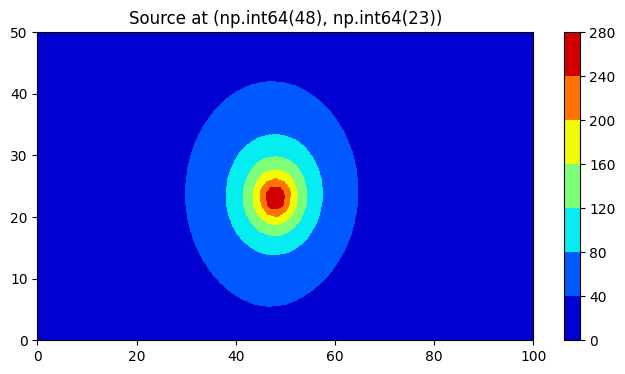

Error at 1 iteration at time 1.4000000000000001 is 5.53E+02
Error at 2 iteration at time 1.4000000000000001 is 5.01E-02
Error at 3 iteration at time 1.4000000000000001 is 1.51E-09


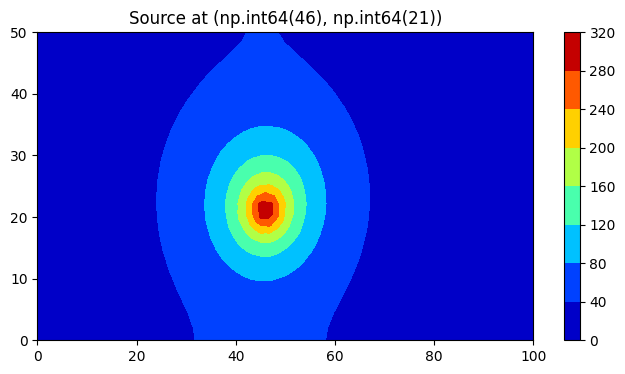

Reading reqd_mesh.msh
Number of nodes in the mesh: 1596
Number of triangles in the mesh: 3040

Error at 1 iteration at time 0.0 is 7.95E+02
Error at 2 iteration at time 0.0 is 1.52E-01
Error at 3 iteration at time 0.0 is 1.28E-08


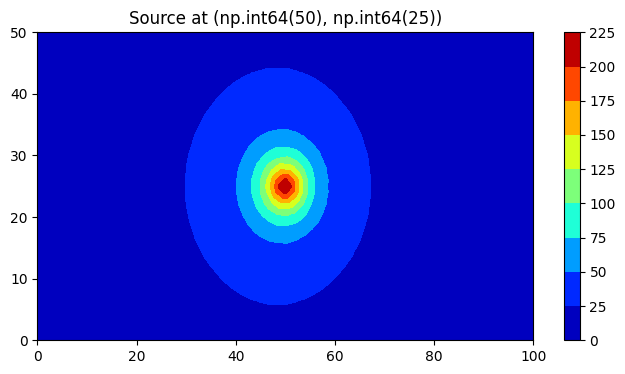

Error at 1 iteration at time 0.6000000000000001 is 5.43E+02
Error at 2 iteration at time 0.6000000000000001 is 5.68E-02
Error at 3 iteration at time 0.6000000000000001 is 2.05E-09


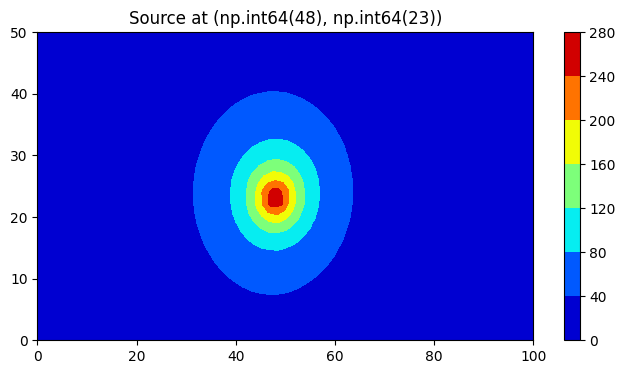

Error at 1 iteration at time 1.2000000000000002 is 5.15E+02
Error at 2 iteration at time 1.2000000000000002 is 4.75E-02
Error at 3 iteration at time 1.2000000000000002 is 1.38E-09


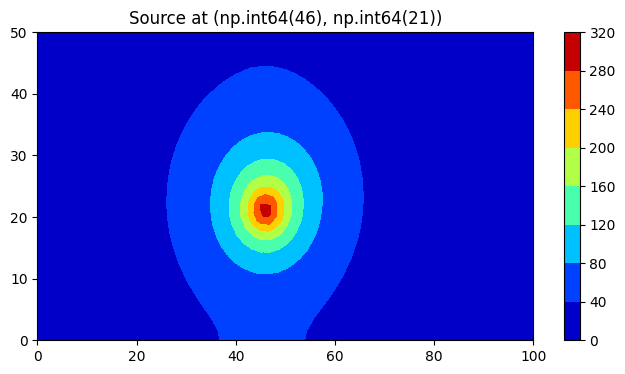

Error at 1 iteration at time 1.8000000000000003 is 5.06E+02
Error at 2 iteration at time 1.8000000000000003 is 4.19E-02
Error at 3 iteration at time 1.8000000000000003 is 1.12E-09


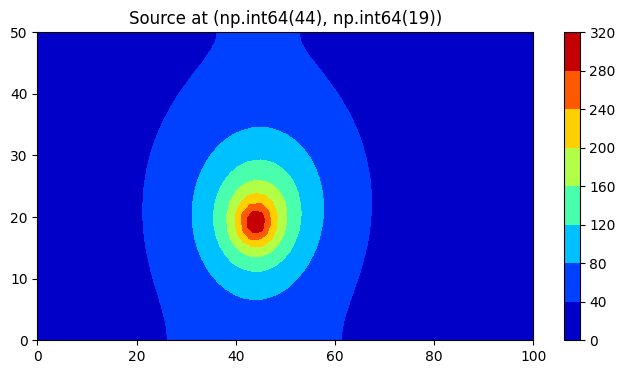

In [6]:
dtimes = np.arange(1,0.5,-.1)
converged_msf = 1
T_l = 20
rep = np.array([[50,25,0]]).reshape(1,-1)
mesh_sizes = []
n_eles = []
T_reps = []

for dt in dtimes:
    nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                    msf_all=converged_msf) 
    theta_init = np.zeros((nodecoords.shape[0],1))+T_l
    h,theta_fin = nr_iterative_rect(nodecoords,ele_con,np.array([[50,25]]),theta_init,dt = dt,t_final =2,type = "transient",mode = "non_linear")
    mesh_sizes.append(h)
    distances = np.sum(np.square(nodecoords-rep),axis = 1)
    closest = np.argmin(distances)
    T_reps.append(theta_fin[closest])
    n_eles.append(len(ele_con))

## Phase change consideration

## Transient analysis

## Adaptive meshing

### Mesh convergence

In [ ]:
# Finding mesh size factor for the adaptive mesh part
mesh_size_factor = 3
area_patch = 12 * 12
area_all = 100*50
msf_patch_all = np.arange(0.1,0.2,0.01)
h_patch = []
h = []
for msf_patch in msf_patch_all:
    nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                        msf_all=mesh_size_factor,
                                        msf_adapt=msf_patch,
                                        side = 12,
                                        x_s=50,
                                        y_s=25,
                                        is_adapt=True
                                    )
    nodes_patch = np.where((np.max(nodecoords[ele_con-1][:,:,0],axis=1)<56)*(np.min(nodecoords[ele_con-1][:,:,0],axis=1)>44)*(np.max(nodecoords[ele_con-1][:,:,1],axis=1)<31)*(np.min(nodecoords[ele_con-1][:,:,1],axis=1)>19))[0]
    h_patch.append((area_patch / len(nodes_patch))**.5)
    h.append((area_all/ len(nodecoords))**.5)

In [ ]:
plt.plot(msf_patch_all,h_patch,'r')
plt.xlabel('Mesh Size Factor')
plt.ylabel('Value of h_patch (mm)')
plt.title('Plot of $h$ v/s Mesh Size Factor (for source term only)')
plt.show()

In [ ]:
print(f'Value of h for mesh size factor 0.15 is '+str(h_patch[5]))

In [ ]:
gc.collect()

In [ ]:
# mesh convergence for the coarser part given that for finer the factor is 0.15
mesh_size_factors = np.array([1]+ np.arange(5,50,5).tolist())
converged_msf_patch = 0.15

#representative point
rep = np.array([50,25,0]).reshape(1,-1)
mesh_sizes = []
T_reps = []
n_ele = []
for mesh_size_factor in mesh_size_factors:
    nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                        msf_all=mesh_size_factor,
                                        msf_adapt=converged_msf_patch,
                                        side = 12,
                                        x_s=50,
                                        y_s=25,
                                        is_adapt=True
                                    )
    soln_qs_p = quasi_static_fem(nodecoords,ele_con,np.array([[50,25]]))
    h,K,G,F,boundary,theta = soln_qs_p.fit_ele(mode = "linear",verbose = False)
    mesh_sizes.append(h)

    distances = np.sum(np.square(nodecoords-rep),axis = 1)
    closest = np.argmin(distances)
    T_reps.append(theta[closest])
    n_ele.append(len(ele_con))

plt.plot(mesh_size_factors,T_reps,'r')
plt.title('Mesh convergence')
plt.xlabel('Mesh size factors')
plt.ylabel(r'Temperature at centre ($\circ$C)')
plt.show()

In [ ]:
ele = np.argsort(n_ele)
plt.plot(np.array(n_ele)[ele],np.array(T_reps)[ele],'r')
plt.title('Mesh convergence')
plt.xlabel('Number of Elements (mm)')
plt.ylabel(r'Temperature at centre ($\circ$C)')
plt.show()

In [ ]:
x = np.log(mesh_size_factors[2:])
y = np.log(T_reps[2:])
slope, intercept = np.polyfit(x, y, 1)  # Degree 1 for a linear fit
y_fit = slope * x + intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
plt.plot(x,y,'r',label = 'original')
plt.plot(x,y_fit,'b--',label = 'best_fit')
plt.title('Mesh convergence')
plt.xlabel('log(Mesh size)')
plt.ylabel(r'log(Temperature at centre)')
plt.show()

In [ ]:
gc.collect()

## Final solution

In [ ]:
# Final solution for Titanium alloy with assumed properties and no physical modelling
T_l = 273+500
vo = 2 #mm/s
t_final = 10
times = [12.5,25,37.5]
converged_msf = 1
x_source = 100
nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                msf_all=converged_msf,
                                msf_adapt=converged_msf_patch,
                                side = 12,
                                x_s=x_source-times[0]*vo,
                                y_s=25,
                                is_adapt=True)

theta_init = np.zeros((nodecoords.shape[0],1))+T_l
theta_prev = theta_init
#Let's move the source
for i,t in enumerate(times):
    nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                    msf_all=converged_msf,
                                    msf_adapt=converged_msf_patch,
                                    side = 12,
                                    x_s=x_source-vo*t,
                                    y_s=25,
                                    is_adapt=True
                                )
    print(f"Time is {t} seconds")
    theta_final = quasi_static_picard(nodecoords,ele_con,theta_prev,source = np.array([[x_source-vo*t,25]]))
    nodecoords,_ = createMesh(geo_file='rectangle.geo',
                                    msf_all=converged_msf,
                                    msf_adapt=converged_msf_patch,
                                    side = 12,
                                    x_s=x_source-vo*(times[i+1] if i+1 < len(times) else 0),
                                    y_s=25,
                                    is_adapt=True
                                )
    theta_prev = np.zeros((nodecoords.shape[0],1))+T_l

In [ ]:
# Normal mesh convergence for phase change consideration of Titanium alloy

mesh_size_factors = np.array(np.arange(1.5,2,0.1).tolist() + np.arange(3,10,1).tolist())
rep = np.array([50,25,0]).reshape(1,-1)
mesh_sizes = []
T_reps = []
n_ele = []
for mesh_size_factor in mesh_size_factors:
    print(mesh_size_factor)
    nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                    msf_all=mesh_size_factor,
                                )
    soln1 = quasi_static_fem(nodecoords,ele_con,np.array([[50,25]]))
    h,K,G,F,boundary,theta = soln1.fit_ele(mode = "linear",verbose = False)
    mesh_sizes.append(h)

    distances = np.sum(np.square(nodecoords-rep),axis = 1)
    closest = np.argmin(distances)
    T_reps.append(theta[closest])
    n_ele.append(len(ele_con))

plt.plot(mesh_size_factors,T_reps,'r')
plt.title('Mesh convergence')
plt.xlabel('Mesh size factors')
plt.ylabel(r'Temperature at centre ($\circ$C)')
plt.show()
    

In [ ]:
ele = np.argsort(n_ele)
plt.plot(np.array(n_ele)[ele],np.array(T_reps)[ele],'r')
plt.title('Mesh convergence')
plt.xlabel('Number of Elements')
plt.ylabel(r'Temperature at centre ($\circ$C)')
plt.show()

In [ ]:
x = np.log(mesh_size_factors[7:])
y = np.log(T_reps[7:])
slope, intercept = np.polyfit(x, y, 1)  # Degree 1 for a linear fit
y_fit = slope * x + intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
plt.plot(x,y,'r',label = 'original')
plt.plot(x,y_fit,'b--',label = 'best_fit')
plt.title('Mesh convergence')
plt.xlabel('log(Mesh size)')
plt.ylabel(r'log(Temperature at centre)')
plt.show()

In [ ]:
nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                msf_all=1
                                )
T_l = 273+500
vo = 2 #mm/s
t_final = 25
times = np.arange(0,t_final,2)
theta_init = np.zeros((nodecoords.shape[0],1))+T_l
theta_prev = theta_init
#Let's move the source
x_source = 75
for t in times:
    nodecoords,ele_con = createMesh(geo_file='rectangle.geo',
                                    msf_all=1
                                )
    print(f"Time is {t} seconds")
    theta_final = quasi_static_picard(nodecoords,ele_con,theta_prev,source = np.array([[x_source-vo*t,25]]),mode="phase_change")
    theta_prev = theta_final